# Financial Data Analysis Mini Project

Con el rápido aumento de la velocidad de los ordenadores, la humanidad ha sido capaz de organizar y analizar grandes cantidades de datos que nunca antes se habían experimentado a una velocidad increíblemente alta.

Basándose en ello, es posible que los ordenadores aprendan y se desarrollen hasta el estado actual de la inteligencia artificial.

Incluso si no te conviertes en un ingeniero de software, puedes resolver muchos problemas prácticos que puedes ver en el mundo real a través de las habilidades de procesamiento de datos que has aprendido hasta ahora usando Python y especialmente Pandas.

Pandas, una biblioteca central de análisis de datos aplicada en diversos campos, se desarrolló originalmente para analizar y organizar datos financieros.

El núcleo del análisis de datos es el análisis de datos financieros. A través de la práctica de adquirir y procesar datos financieros de diversos factores acumulados durante un período de tiempo, puede estar suficientemente preparado para la mayoría de los tipos de datos que verá en el trabajo del mundo real.

El análisis de datos financieros es la práctica más eficaz en el análisis de datos.

El material utilizado para el análisis de datos son los datos bursátiles que rastrean diversos sectores y condiciones económicas. 

No se trata simplemente de analizar el precio de las acciones de una empresa concreta. Se eligió porque no hay mejores datos objetivo para comprender cada situación económica como una economía real. 

Además, los datos objetivo no se refieren a empresas, materias primas, bonos o a un país concreto, sino al precio de los productos agrícolas en todo el mundo.

Dado que el mercado de EE.UU. tiene un impacto muy grande en la economía real del mundo, fue seleccionado como una buena práctica con datos significativos.

**Nombre del marcador**
  
* SPY, que sigue el índice líder de EE.UU. S&P500
* IYW, que sigue el índice de capitalización bursátil de empresas tecnológicas de EE.UU.
* VT, que invierte en empresas de todo el mundo.
* DBA, que sigue la oferta y la demanda de productos y precios agrícolas.
* Tipo de los bonos estadounidenses TLT
* PDBC, que sigue la oferta y la demanda de otras materias primas y sus precios.
* Oro IAU

## Paso 1
**Preparémonos para la adquisición de datos y creemos funciones de adquisición de datos.**

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 5.0 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 12.7 MB/s eta 0:00:0000:0100:01
  Created wheel for frozendict: filename=frozendict-2.4.2-cp312-cp312-macosx_10_9_universal2.whl size=15508 sha256=74ced5495dcaff0273503a990e4bcc94ea42a2a94e259c6d80844818dadf2572
  Stored in directory: /Users/socrates/Library/Caches/pip/wheels/27/ad/d9/1c34a1bc48bf0

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

from datetime import date, datetime, time, timezone

In [3]:
def get_stock_data(ticker, start, end):
    data = yf.download(ticker, start, end)
    data.insert(0, "Ticker", ticker)
    return data

Para comprobar si la adquisición de datos funciona correctamente, **introduzca el código del ticker de Disney ("DIS") para probar la función.**

Utilice como fecha inicial el 1 de Enero de 2020 y como fecha final hoy.

Una búsqueda de ticker se puede hacer fácilmente a través de Yahoo Finanzas o investing.com

In [4]:
df = get_stock_data("DIS",'2020-01-01','2024-04-24')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,DIS,145.289993,148.199997,145.100006,148.199997,147.718567,9502100
2020-01-03,DIS,146.399994,147.899994,146.050003,146.500000,146.024094,7320200
2020-01-06,DIS,145.539993,146.029999,144.309998,145.649994,145.176849,8262500
2020-01-07,DIS,145.990005,146.869995,145.419998,145.699997,145.226685,6906500
2020-01-08,DIS,145.490005,146.130005,144.820007,145.399994,144.927658,6984200


Dado que el análisis se basará únicamente en el precio de cierre de cada teletipo ("Close"), **pivote en la forma requerida.**

In [5]:
# pivot dataframe
df = pd.pivot_table(df,values='Close', index='Date')
df.head()

,Close
Date,
2020-01-02,148.199997
2020-01-03,146.500000
2020-01-06,145.649994
2020-01-07,145.699997
2020-01-08,145.399994


## Paso 2

**Cree cada dataframe necesario para el análisis utilizando la función creada.**

El nombre del dataframe Será el nombre de la etiqueta: SPY / IYW / VT / DBA / TLT / PDBC / IAU

In [6]:
SPY = get_stock_data("SPY",'2020-01-01','2024-04-24')
IYW = get_stock_data("IYW",'2020-01-01','2024-04-24')
VT = get_stock_data("VT",'2020-01-01','2024-04-24')
DBA = get_stock_data("DBA",'2020-01-01','2024-04-24')
TLT = get_stock_data("TLT",'2020-01-01','2024-04-24')
PDBC = get_stock_data("PDBC",'2020-01-01','2024-04-24')
IAU = get_stock_data("IAU",'2020-01-01','2024-04-24')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
SPY.columns


Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Pivote cada dataframe para visualizar únicamente el cierre ("Close")**

In [8]:

SPY = pd.pivot_table(SPY,values='Close', index='Date')
IYW = pd.pivot_table(IYW,values='Close', index='Date')
VT = pd.pivot_table(VT,values='Close', index='Date')
DBA = pd.pivot_table(DBA,values='Close', index='Date')
TLT = pd.pivot_table(TLT,values='Close', index='Date')
PDBC = pd.pivot_table(PDBC,values='Close', index='Date')
IAU = pd.pivot_table(IAU,values='Close', index='Date')

DBA.head()

,Close
Date,
2020-01-02,16.500000
2020-01-03,16.309999
2020-01-06,16.350000
2020-01-07,16.389999
2020-01-08,16.309999


**Cada dataframe creado se combinará en un único dataframe para un análisis eficiente.**

En este momento, si la configuración y las propiedades de los dataframes a fusionar son las mismas, se puede mantener la consistencia de los datos independientemente de la dirección de la fila o columna. Recuerda que esto es algo que debes comprobar antes de fusionar dataframe.

Cada dataframe que vamos a fusionar ahora tiene el mismo índice, la misma columna y el mismo tipo de elementos de datos. Por lo tanto, utilizamos la función concat() para concatenar manteniendo la forma del marco de datos existente.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [9]:

stock = pd.concat([SPY, IYW, VT, DBA, TLT, PDBC, IAU], axis=1, keys=['SPY', 'IYW', 'VT', 'DBA', 'TLT', 'PDBC', 'IAU'])
stock = stock.droplevel(1, axis=1)
stock.head()

,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,324.869995,59.355000,81.809998,16.500000,137.009995,16.639999,29.219999
2020-01-03,322.410004,58.762501,81.070000,16.309999,139.119995,16.780001,29.620001
2020-01-06,323.640015,59.125000,81.370003,16.350000,138.330002,16.799999,29.920000
2020-01-07,322.730011,59.147499,81.120003,16.389999,137.649994,16.770000,30.040001
2020-01-08,324.450012,59.737499,81.449997,16.309999,136.740005,16.540001,29.820000


## Paso 3

Si **dibuja un gráfico basado en los datos del precio de cierre en una serie temporal** (fecha), podrá comprobar el movimiento del precio de las acciones.

Si superpone los gráficos de cada ticker, podrá ver la correlación aproximada.

In [10]:
for key in stock.columns.unique():
    print(stock[key])


Date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2024-04-17    500.549988
2024-04-18    499.519989
2024-04-19    495.160004
2024-04-22    499.720001
2024-04-23    505.649994
Name: SPY, Length: 1084, dtype: float64
Date
2020-01-02     59.355000
2020-01-03     58.762501
2020-01-06     59.125000
2020-01-07     59.147499
2020-01-08     59.737499
                 ...    
2024-04-17    129.339996
2024-04-18    128.410004
2024-04-19    124.750000
2024-04-22    126.239998
2024-04-23    128.520004
Name: IYW, Length: 1084, dtype: float64
Date
2020-01-02     81.809998
2020-01-03     81.070000
2020-01-06     81.370003
2020-01-07     81.120003
2020-01-08     81.449997
                 ...    
2024-04-17    105.589996
2024-04-18    105.430000
2024-04-19    104.940002
2024-04-22    105.919998
2024-04-23    107.129997
Name: VT, Length: 1084, dtype: float64
Date
2020-01-02    16.500000
2020-01-03  

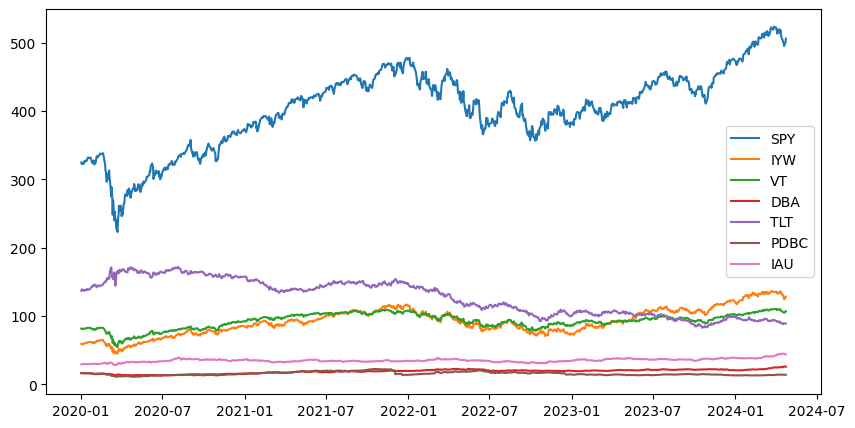

In [11]:
#show diferent stocks
plt.figure(figsize=(10,5))
for i in stock.columns.unique():
    plt.plot(stock[i].index, stock[i], label=stock[i].name)
plt.legend()
plt.show()


Si observa el gráfico siguiente, hay una sección con graves fluctuaciones de precios. Se trata del periodo en el que comenzó Coronavirus.

**Comprobemos los datos cortándolos utilizando el índice de datos de series temporales sólo para este periodo (1 de Febrero de 2020 a 31 de Julio de 2020).**

In [12]:
covid_df = stock.copy()
covid_df.sort_index(inplace=True)
covid_df = covid_df.loc['2020-02-01':'2020-07-31']

**Dibuje los datos en una gráfica**

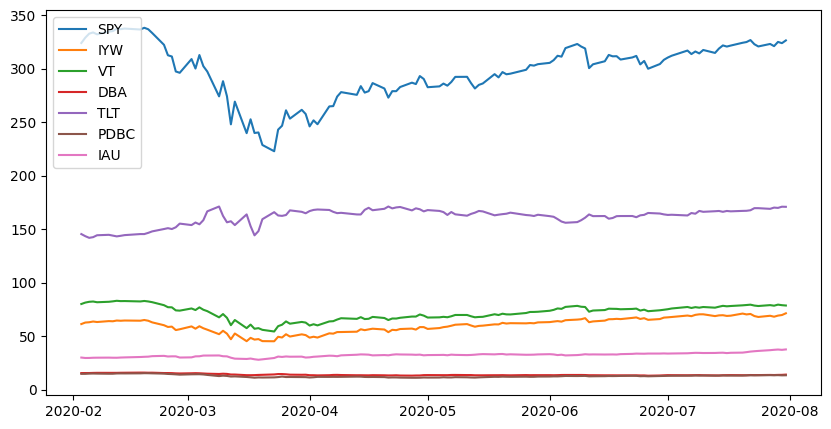

In [13]:
plt.figure(figsize=(10,5))
for i in covid_df.columns.unique():
    plt.plot(covid_df[i].index, covid_df[i], label=covid_df[i].name)
plt.legend()
plt.show()

**Separemos los factores de periodo relevantes para comprobar el gráfico.**

In [14]:
x = covid_df.index
s_y = covid_df[["SPY"]]
i_y = covid_df[["IAU"]]
d_y = covid_df[["DBA"]]
t_y = covid_df[["TLT"]]

Comparemos cómo reaccionan activos con personalidades diferentes en momentos de gran conmoción económica como el coronavirus.

Puede ver que, en general, el precio de las acciones cae bruscamente y luego se recupera gradualmente, pero en el caso del oro y los bonos ocurre lo contrario. En particular, en el caso de los bonos, se puede ver que la tendencia es opuesta a la del precio de las acciones.

Para visualizarlo, **dibuje 3 gráficas en una única fila y 3 columnas, con los datos de la época de covid de SPY, IAU y TLT.**

El título de la gráfica general será "Covid 19"

## Paso 4

**Descarguemos los datos de volumen de negociación ("Volume") para un ticker concreto ("PDBC"), entre el 1 de Enero de 2020 y hoy.**

In [ ]:
df = get_stock_data(...

**Ahora visualicemos en forma de gráfico de barras esos datos.**

In [ ]:
...
plt.show()

## Paso 5

Utilizando el método `subplot2grid` de matplotlib, el gráfico del precio de cierre ("Closing") se debe visualizar en la parte superior y el volumen de negociación ("Volume") en el mismo periodo se visualiza en la parte inferior.

`ax = subplot2grid((nrows, ncols), (row, col), rowspan, colspan)`

https://matplotlib.org/stable/gallery/userdemo/demo_gridspec01.html#sphx-glr-gallery-userdemo-demo-gridspec01-py

In [ ]:
...
plt.show()

## Paso 6

Utilizaremos el método `pandas.Series.shift()` para calcular el cambio porcentual diario.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html?highlight=shift#pandas.Series.shift

Comparar los datos actuales con los datos en un punto específico en el tiempo para calcular el cambio porcentual es también una tarea común en el trabajo diario.

La fórmula para calcular la variación porcentual diaria basada en el precio de cierre es sencilla:
 
 
$Todays\_daily\_percentage\_change = ((Todays\_closing\_price - Yesterdays\_closing\_price) / Yesterdays\_closing\_price) * 100 Daily\_Percentage\_Change = (New\_Value – Original\_Value) / Original\_Value * 100$

**Calcula en la serie `spy_daily_pc`  el cambio porcentual para cada día con respecto al anterior. Utiliza para ello la fórmula anterior y el método `shift` con desplazamiento de 1.**

In [ ]:
spy_daily_pc = ...
spy_daily_pc.head()

**Dibuja la gráfica del cambio porcentual a lo largo del tiempo.**

In [ ]:
...
plt.show()

Un histograma es un gráfico que muestra la distribución de frecuencias.

Representa la frecuencia de los valores de datos por tiempo.

En este momento, el número de secciones se utiliza fijando el valor del parámetro bins de la función `hist()`.

Como referencia, el valor por defecto de hist() es 10. La forma del gráfico cambia en función de los bins. Debe establecer el valor de bins comprobando cuidadosamente las características de los datos.

`pandas.DataFrame.hist()`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html?highlight=hist#pandas.DataFrame.hist

Como en la primera fila el cambio porcentual no tiene valor, debe poner un valor de 0.

**Dibuje el histograma de `spy_daily_pc` con un valor de bins de 50.**

La frecuencia se expresa dividiendo la variación porcentual diaria del precio de las acciones en 50 tramos.

## Paso 7

Vamos a crear un nuevo dataframe que calcule las variaciones diarias del precio de las acciones para todos los tickers, calcule los rendimientos acumulados diarios y analice la correlación.

In [ ]:
stock_daily_pc = ...
stock_daily_pc.head()

La fórmula de la rentabilidad acumulada diaria simple también es sencilla.

Se puede obtener acumulando y multiplicando la tasa de variación diaria de la cotización obtenida anteriormente. Podemos utilizar el método `.cumsum()`.
 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html

**Calcule la rentabilidad acumulada.**

In [ ]:
stock_d_cr = ...

**Dibuje una gráfica del dataframe con la rentabilidad acumulada (cumsum).**

In [ ]:
...
plt.show()

## Paso 8

El coeficiente de correlación se refiere a la medición de la fuerza de la asociación entre los datos, como hemos aprendido antes.

Cuanto más cercano a 1.0, más fuerte es la relación, y cuanto más cercano a 0, menor es la relación.

**Analicémoslo utilizando la función aprendida `.corr()`.**

In [ ]:
df_corr = ...
df_corr.head()

**Visualicémoslo como un mapa de calor.**

Cuanto más oscuro es el color, menor es la correlación, y cuanto más brillante es el color, mayor es la correlación. 

Comprobemos cómo se correlaciona cada factor económico en la economía real.

In [ ]:
plt...

**Ahora dibuja un scatter plot entre los valores correlacionados de SPY y VT**

In [ ]:
...
plt.show()

Puede ver que los bonos estadounidenses y las acciones en general no están nada correlacionados con las condiciones económicas.

Si piensas una vez más aplicando el coeficiente de correlación en la práctica, existe un efecto complementario para cada activo. Puedes crear una estrategia para mitigar el riesgo.

Un coeficiente de correlación cercano a 1 significa que el valor sube cuando este sube y baja cuando este baja. Significa que no hay un efecto de mitigación del riesgo entre ellos.

Si el coeficiente de correlación es cercano a 0, significa que no hay relación entre las subidas y las bajadas del valor y, por el contrario, el efecto de mitigación del riesgo es grande.

Por ejemplo, puede utilizarse para elaborar un plan de marketing en el mundo real. 

Como herramienta de toma de decisiones basada en datos, puede utilizarse para analizar la correlación entre el calendario de ventas y las ventas por producto, establecer el momento de lanzamiento de un producto y crear carteras de empresas.

## Paso 9

Sigamos la evolución del precio de las acciones durante un periodo de tiempo determinado.

Esta técnica suele utilizarse para determinar la tasa de riesgo de la acción comparando la volatilidad de todo el índice del mercado como dato de referencia.

El propósito es medir la cantidad de cambio en un periodo específico y compararlo con datos de referencia estables para utilizarlo para determinar el riesgo de los datos evaluados en ese momento.

En primer lugar, la volatilidad del precio de las acciones puede obtenerse calculando la desviación típica de la volatilidad del precio de las acciones a través de la media móvil.

Lo que más influye en estos datos es el periodo de tiempo que se va a seguir. Es decir, el tamaño de la ventana tiene un gran efecto.

Si la ventana es amplia, la representatividad será borrosa, y si es demasiado estrecha, se acercará a la desviación típica. Es muy difícil e importante fijar el tamaño de la ventana que se va a medir.

No todo se puede concluir mediante cálculos informáticos. Hay muchos momentos en los que hay que tomar una decisión basándose en la comprensión del contexto y del resultado a conseguir.

Es muy importante entender que los resultados de los datos pueden ser diferentes dependiendo del juicio del alumno, y la toma de decisiones en el mundo real se puede cambiar en consecuencia, en lugar de limitarse a aprender las habilidades como una tarea práctica utilizando pandas.

**Calcula la desviación típica para el dataframe de variaciones diarias de precio (`stock_daily_pc`) con un periodo de 75 días.**

In [ ]:
periods = 75

vol = ...

vol.tail()

**Visualice los valores para los tickers de SPY, TLT y DBA.**

In [ ]:
...
plt.show()